# Intelligente systemer: Dimensjonsreduksjon

Velkommen til denne notebooken som inngår i Høyskolen Kristianias emne «Utvikling og anvendelse av intelligente systemer», modul 4, «Ikke-veiledet læring».

## Hvordan du bruker denne notebooken

Dette er en Jupyter notebook med tekst og Python-kode som du kjører ved å trykke shift-enter. Hensikten er å bli kjent med relevante konsepter i praksis, ikke nødvendigvis å forstå alle detaljer i koden. Ta deg god tid til å lese teksten, se gjennom koden, kjøre kodecellene (pass på riktig rekkefølge), studere resultatene, og tenke gjennom hva vi gjør, hvorfor og hvordan.

Underveis i teksten vil du finne referanser til en Canvas-oppgave _i kursiv_. Gå til Canvas og besvar spørsmålet der før du går videre i notebooken.

## Problemstilling: Dimensjonsreduksjon med Iris-datasettet

En typisk anvendelse av dimensjonsreduksjonsteknikker (bl.a. prinsipalkomponentanalyse) er datavisualisering. I denne notebooken skal vi anvende prinsipalkomponentanalyse til et godt kjent 4-dimensionalt datasett.

Høydimensjonale datasett er vanskelig å visualisere i 2 eller 3 dimensjoner. En nyttig algoritme vi har i verktøykassa, er prinsipalkomponentanalyse (PCA). Denne algoritmen projiserer datapunktene lineært på et lavdimensjonalt underrom som maksimerer variansen til datapunktene.

Det klassiske Iris-blomsterdatasettet inneholder bredden og lengden på kronbladet og begerbladet (sepal) av 150 irisblomster. Disse blomstene tilhører en av tre kategorier: Iris setosa, Iris virginica og Iris versicolor. Vi har tilgang til kategoridata i dette datasettet (merkede data), men vi vil bare bruke datamatrisen uten etikettene som input til PCA-algoritmen.

In [1]:
import sklearn
import sklearn.decomposition
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

Iris-blomsterdatasettet er tilgjengelig i datasettmodulen for scikit-learn. La oss ta en rask titt på datasettet.

In [2]:
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
pd.DataFrame(X, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Hver datapost (rad) inneholder fire parametere (features) relatert til blomstens morfologi. La oss vise de to første dimensjonene. Fargene skiller Iris-typen (etikett):

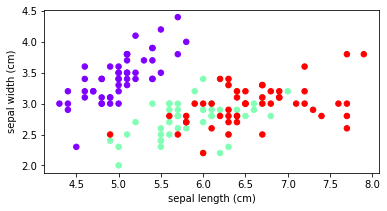

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.rainbow)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

La oss prøve tre dimensjoner, og se om det blir tydeligere:

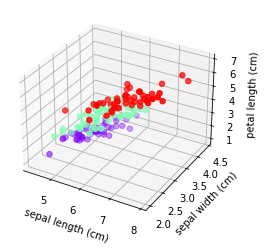

In [4]:
fig = plt.figure()
ax3d = fig.add_subplot(projection='3d')
ax3d.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=30, cmap=plt.cm.rainbow)
ax3d.set_xlabel(iris.feature_names[0])
ax3d.set_ylabel(iris.feature_names[1])
ax3d.set_zlabel(iris.feature_names[2])
plt.show()

Nå begynner faktisk visualiseringen å bli vanskeligere.

Vi anvender nå PCA på datasettet. Med scikit-learn kan det gjøres med én linje:

In [5]:
X_PCA = sklearn.decomposition.PCA().fit_transform(X)

Vi viser nå det samme datasettet i et nytt koordinatsystem (altså en lineær transformasjon av det første datasettet):

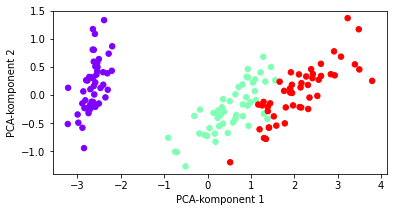

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, s=30, cmap=plt.cm.rainbow)
ax.set_xlabel("PCA-komponent 1")
ax.set_ylabel("PCA-komponent 2")
plt.show()

Her ser vi på et nytt punktdiagram, men aksene er annerledes. I stedet for de to første *features* i datasettet, har vi valgt de to første prinsipalkomponentene, altså de to ortogonale retningene som beholder mesteparten av informasjonen i datasettet. Heldigvis kan de tre blomstertypene skilles tydeligere langs disse aksene.

_Oppgave: Svar på flervalgsspørsmål 1 (vist nedenfor) i Canvas._

1. _Er det riktig å påstå at prinsipalkomponentanalyse (PCA) alltid gjør klassifiseringsoppgavene lettere?_

3D-visualiseringer kan egentlig være forvirrende om man ikke bruker dem fornuftig. Her er dataene godt separert, men det er ikke så umiddelbart tydelig i et 3D-plott.

In [ ]:
fig = plt.figure()
ax3d = fig.add_subplot(projection='3d')
ax3d.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y, s=30, cmap=plt.cm.rainbow)
ax3d.set_xlabel("PCA-komponent 1")
ax3d.set_ylabel("PCA-komponent 2")
ax3d.set_zlabel("PCA-komponent 3")
plt.show()

Datapostene som tilhører samme kategori er nå gruppert sammen, selv om PCA-algoritmen **ikke** har brukt etikettene. PCA klarte å finne en projeksjon som maksimerte variansen. I dette tilfellet medførte det at klassene ble godt adskilt.

PCA er kun en lineær dimensjonsreduksjonsalgoritme, men den hjelper oss å separere datapunktene. Ikke-lineære teknikker som *auto-enkodere* har potensial til å gi enda bedre resultater – forutsatt at man har nok data til å trene dem.